# Team Project 4 - Linear Algebra and Data Compression

Linear algebra provides many powerful and interesting applications. Examples include:
<ul>
    <li>Face recognition via Eigenface;</li>
    <li>Data compression using Singular Value Decomposition;</li>
    <li>JPEG/MPEG compression via discrete cosine transform;</li>
    <li>Signal/sound compression via Fourier series.</li>
</ul>
A common feature is that by using technique of linear algebra, one may find a very nice approximation of given data (in a very big or even infinite dimensional vector space) in a reasonable small vector space. 

In this project, we investigate how to compress continous sound data by using finitely many numbers.

Sound data is given as a continuous function $f(t)$. If we divide the time interval into reasonably small subintervals, then on each interval the function $f(t)$ looks like a periodic function, because sound is a vibration that propagates as a (in general very complicated) wave of pressure and a wave is periodic. From now on, for simplicity, assume that the period of $f(t)$ is $2\pi$ and we will assume that $f(t) \in C[-\pi, \pi]$. 

On $C[-\pi, \pi]$, the following formula yields an inner product:
$$\langle g, h\rangle = \frac{1}{\pi}\int_{-\pi}^{\pi}g(t)h(t)dt.$$
Furthermore, we know that the following set is an orthonormal set. 
$$T_n := \{\frac{1}{\sqrt{2}}, \sin t, \cos t, \sin 2t, \cos 2t, \cdots, \sin nt, \cos nt\}$$
Let $W_n$ be the sub vector space of $C[-\pi, \pi]$ spanned by $T_n$. Then for any $f(t) \in C[-\pi, \pi]$, its best approximation in $W_n$ is given by
$$\hat{f}_n(t) := \langle f(t), 1\rangle \frac{1}{2} + \sum_{k=1}^n \langle f(t), \sin kt\rangle \sin kt + \sum_{k=1}^n \langle f(t), \cos kt\rangle \cos kt.$$

#### 1. (20 pts) Construct a function Simpson(f, m) which evaluates the definite integral $$\int_{-\pi}^{\pi}f(t)dt$$ with $m$ intervals by using Simpson's rule. Note that $m$ has to be an even number.

In [24]:
import math

def Simpson(f,m):  
    h = (2*math.pi)/m 
    x = [-math.pi + i*(2*math.pi)/m for i in range(m+1)]
    sum = 0
    for i in range(m+1):
        if i == 0 or i == m:
            sum += f(x[i])
        elif i % 2 == 0:
            sum += 2 * f(x[i])
        else:
            sum += 4 * f(x[i])
    return (h/3) * sum


# f(t) = t from -pi to pi, two intervals
m = 2
f = lambda t: t
print(Simpson(f,m)) # 0.0

# f(t) = t^2-4t+6 from -pi to pi, four intervals
m = 4
f = lambda t: (t**2)-4*t+6
print(Simpson(f,m)) # 58.370

0.0
58.3699629632774


#### 2. (15 pts) Create a function FourierCoeff(f, n) which returns the list of Fourier coefficients $a_0, a_1, \cdots, a_n$ and $b_1, b_2, \cdots, b_n$ where $a_0 = \langle f(t), 1\rangle$, $a_k = \langle f(t), \cos kt\rangle$ for $k \ge 1$, $b_k = \langle f(t), \sin kt\rangle$. To calculate each coefficient, use the function Simpson(f, m) with $m = 200$.

In [3]:
import math
import numpy as np

def FourierCoeff(f,n):
    a = []
    b = []
  
    #Append a_0
    a.append(0.5*(1/math.pi)*Simpson(f,200))
    
    #Append a_1-a_k and b_1-b_k
    for k in range(1,n+1):
        f_sin = lambda x: f(x)*math.sin(k*x)
        f_cos = lambda x: f(x)*math.cos(k*x)
        a.append((1/math.pi)*Simpson(f_sin,200))
        b.append((1/math.pi)*Simpson(f_cos,200))
    
    return a,b

def Simpson(f,m):  
    h = (2*math.pi)/m 
    x = [-math.pi + i*(2*math.pi)/m for i in range(m+1)]
    sum = 0
    for i in range(m+1):
        if i == 0 or i == m:
            sum += f(x[i])
        elif i % 2 == 0:
            sum += 2 * f(x[i])
        else:
            sum += 4 * f(x[i])
    return (h/3) * sum
                 
f = lambda x: math.sqrt((math.pi**2)-(x*x))

a,b = FourierCoeff(f,2)
print(a)
print()
print(b)
print()

f = lambda x: np.exp(x)
a,b = FourierCoeff(f,5)
print(a)
print()
print(b)
print()

f = lambda x: x**2
a,b = FourierCoeff(f,5)
print(a)
print()
print(b)
print()



[2.4670402504601676, 2.775557561562892e-16, -7.484753557681264e-17]

[0.8948670800965633, -0.33433103451952434]

[3.676077930266163, 3.6760778307821917, -2.9408624076962964, 2.2056474623347375, -1.7299210874606008, 1.4138805048402137]

[-3.67607783081959, 1.4704307263008385, -0.7352145461333919, 0.432477878920466, -0.28277226614619166]

[3.289868133696453, 3.252534549377602e-16, -5.528072837085067e-16, -6.954953615891217e-16, -9.013057422653673e-17, 8.017416417338515e-16]

[-3.999999935047883, 0.9999997400388364, -0.44444385895849076, 0.24999895770662484, -0.15999836853823454]



Note that the initial data is a continuous function, but the approximation is recorded as a list of $2n+1$ numbers!

#### 3. (15 pts) Create a function FourierApprox(f) which plots the graphs of $f(t)$ and $S_n(t)$ with $n = 2, 5, 10$ over $[-\pi, \pi]$ on the same plane (with different color). Test your function with $f(t) = \cosh(t)$ and $f(t) = \sqrt{\pi^2-t^2}$. Run the function with your favorite $f(t)$, too. Note that to get a 'periodic' continuous function $f(t)$ defined on $\mathbb{R}$, $f(-\pi) = f(\pi)$. Test your function with $f(t) = e^t$ as well (Note that this one is continuous on $[-\pi, \pi]$, but does not continuously extend to $\mathbb{R}$ because $f(-\pi) \ne f(\pi)$. See what happens near two boundary points.). 

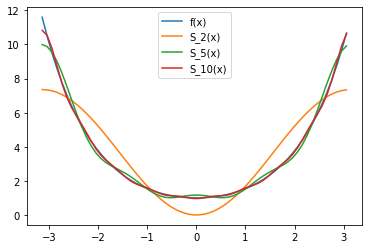

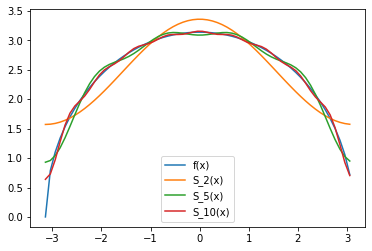

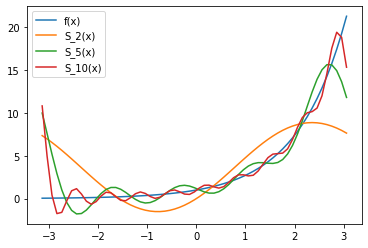

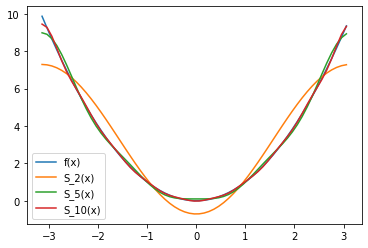

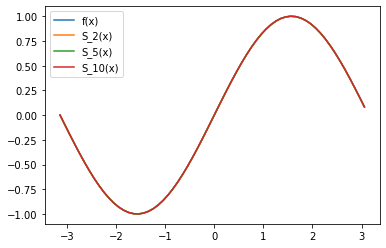

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

def FourierApprox(f):
    # Function
    x = np.arange(-np.pi, np.pi, 0.1)
    y1 = f(x)
    
    y2 = []
    y3 = []
    y4 = []
    
    # Fourier approximation
    n = 2
    a,b = FourierCoeff(f,n)
    for x in np.arange(-np.pi, np.pi, 0.1):
        y2.append(S_n(x,a,b,n))
    
    n = 5
    a,b = FourierCoeff(f,n)
    for x in np.arange(-np.pi, np.pi, 0.1):
        y3.append(S_n(x,a,b,n))
    
    n = 10
    a,b = FourierCoeff(f,n)
    for x in np.arange(-np.pi, np.pi, 0.1):
        y4.append(S_n(x,a,b,n))
   
    # Plotting graph
    plt.plot(np.arange(-np.pi, np.pi, 0.1), y1, label = "f(x)")
    plt.plot(np.arange(-np.pi, np.pi, 0.1), y2, label = "S_2(x)")
    plt.plot(np.arange(-np.pi, np.pi, 0.1), y3, label = "S_5(x)")
    plt.plot(np.arange(-np.pi, np.pi, 0.1), y4, label = "S_10(x)")
    
    plt.legend()
    plt.show()
    
def S_n(x,a,b,n):
    s_n = a[0]
    for i in range(1,n):
        s_n += b[i-1]*math.cos(i*x)
    for i in range(1, n):
        s_n += a[i]*math.sin(i*x) 
    return s_n 
    
def FourierCoeff(f,n):
    a = []
    b = []
  
    #Append a_0
    a.append(0.5*(1/math.pi)*Simpson(f,200))
    
    #Append a_1-a_k and b_1-b_k
    for k in range(1,n+1):
        f_sin = lambda x: f(x)*math.sin(k*x)
        f_cos = lambda x: f(x)*math.cos(k*x)
        a.append((1/math.pi)*Simpson(f_sin,200))
        b.append((1/math.pi)*Simpson(f_cos,200))
    
    return a,b

def Simpson(f,m):  
    h = (2*math.pi)/m 
    x = [-math.pi + i*(2*math.pi)/m for i in range(m+1)]
    sum = 0
    for i in range(m+1):
        if i == 0 or i == m:
            sum += f(x[i])
        elif i % 2 == 0:
            sum += 2 * f(x[i])
        else:
            sum += 4 * f(x[i])
    return (h/3) * sum
                 
f1 = lambda x: np.cosh(x)
f2 = lambda x: np.sqrt((math.pi**2)-(x*x))
f3 = lambda x: np.exp(x)
f4 = lambda x: x**2
f5 = lambda x: np.sin(x)

FourierApprox(f1)
FourierApprox(f2)
FourierApprox(f3)
FourierApprox(f4)
FourierApprox(f5)
